# Comparing `lstsq()` and `curve_fit()`

In [2]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
n = 1 * np.random.randn(len(t))
yn = y + n

Plotting using `curve_fit()`:

Mean absolute error using curve_fit =  1.0158166660226782
210 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


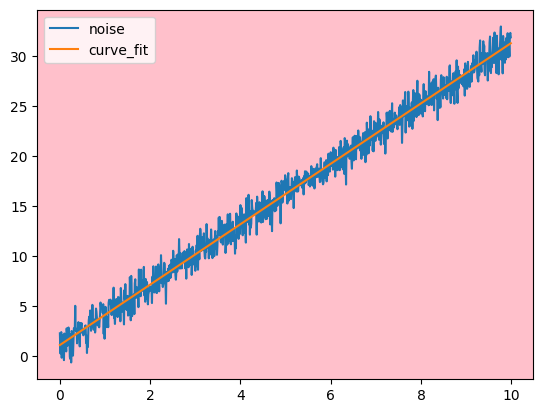

In [4]:
from scipy.optimize import curve_fit
def lin(x,m,c):
    return m*x + c

def curvefit():
    #estimating h and T
    (m, c), pcov = curve_fit(lin, t, yn)   
    yest = lin(t, m, c) #fitting a curve
    return t, yn, yest

t, yn, yest = curvefit()
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(t, yn, label = 'noise')
plt.plot(t, yest, label = 'curve_fit')
plt.legend()

curve_fit_error = np.std(yest-yn)
print("Mean absolute error using curve_fit = ", curve_fit_error)
%timeit curvefit()

Plottin using `lstsq()`:

In [5]:
# Use column_stack to put the vectors side by side
def lstsq():
    M = np.column_stack([t, np.ones(len(t))])
    # Use the lstsq function to solve for p_1 and p_2
    (p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
    return p1, p2
p1, p2 = lstsq()
%timeit lstsq()

32.3 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


`lstsq()` is faster (~45 us) and more efficient than `curve_fit()` (~270 us)and runs around 10 times faster for a typical data size of 1000.

Mean absolute error using lstsq =  1.0158166660226782


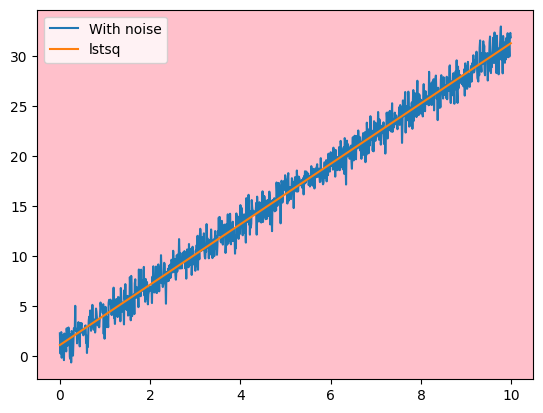

In [6]:
# Plot against the original input and compare
ax=plt.axes()
ax.set_facecolor('pink')
yest = stline(t, p1, p2)
# plt.plot(t, y, t, yn, t, yest)
lstsq_error = np.std(yest-yn)
print("Mean absolute error using lstsq = ", lstsq_error)
plt.plot(t, yn, label = 'With noise')
plt.plot(t, yest, label = 'lstsq')
plt.legend()

Comparing mean absolute errors, we observe that curve_fit and lstsq are equally accurate for a linear fit.

# Dataset 1
This data corresponds to a straight line with noise added. Estimate the slope and intercept values. Plot the resulting line in a different colour over the noisy data to check the quality of the fit. Will you use lstsq or curve_fit for this?

In [7]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [8]:
x1, y1 = loadtxt('dataset1.txt', unpack = True)
# Plotting the dataset
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x1, y1, c = 'g')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

FileNotFoundError: dataset1.txt not found.

The plot resembles a straight line, so we can use a linear fit. </br>
$y = p_1x + p_2$

In [ ]:
M = np.column_stack([x1, np.ones(len(x1))])

Using the `lstsq` function to find parameters $p_1$ and $p_2$:

In [ ]:
(p1, p2), _, _, _ = np.linalg.lstsq(M, y1, rcond  = None)
print(f"The estimated equation is y = {p1}x + {p2}")

The estimated equation is y = 2.791124245414918x + 3.848800101430742


Text(0, 0.5, 'y$\\rightarrow$')

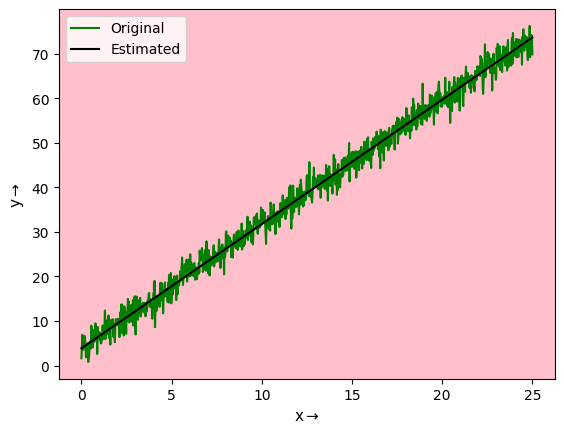

In [ ]:
# Fitting a straight line with parameters
def stline(x, m, c):
    return m * x + c
yest1 = stline(x1, p1, p2)
# Plotting estimated verseus actual values for each input
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x1, y1, label = 'Original', c = 'g')
plt.plot(x1, yest1, label = 'Estimated', c = 'k')
plt.legend()
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

Plotting error bars:

Text(0, 0.5, 'y$\\rightarrow$')

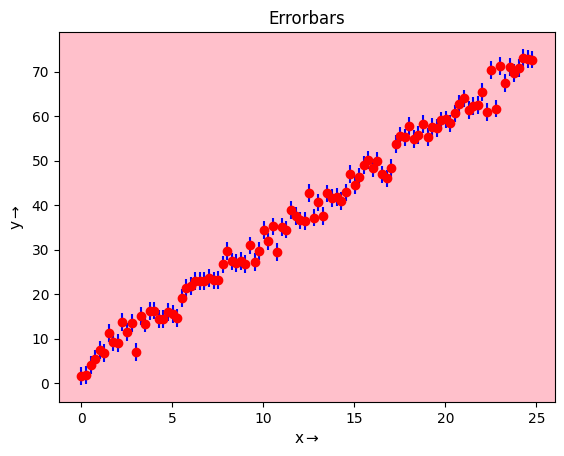

In [ ]:
# Plotting errorbars
sd = np.std((yest1-y1)) # Standard deviation of error
ax=plt.axes()
ax.set_facecolor('pink')
plt.title("Errorbars")
plt.errorbar(x1[::10], y1[::10], yerr=sd, fmt='ro', ecolor= 'b')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

# Dataset 2:

Text(0, 0.5, 'y$\\rightarrow$')

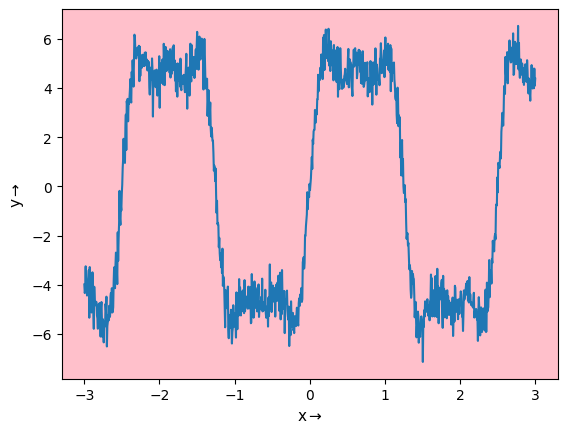

In [ ]:
x, y = loadtxt('dataset2.txt', unpack = True)
# Plotting the dataset
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x, y)
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

The plot represents the sum of several sine waves that are harmonics of some fundamental frequency. </br>
It resembles the first few terms of the fourier series of an amplified square wave.

We need to plot for different harmonics, incrementing each time to see which curve fits well. 

Clearly non-linear fitting is adequate.

Consider a square wave of length $2L$.

$$b_n = \frac 1L \int_0^{2L} f(x) \sin \left (\frac{n \pi x}{L} \right) dx$$

$$b_n = \frac 2L \int_0^{L} f(x) \sin \left (\frac{n \pi x}{L} \right) dx$$

$$b_n = \frac 4 {n \pi} \sin^2 \left ( \frac12 n \pi \right)$$

$$b_n = \frac 2{n \pi} [1 - (-1)^n]$$

$$b_n = \frac 4 {n \pi} \begin{cases} 0, n \text{ even} \\ 1, n \text{ odd} \end{cases}$$

The fourier series is therefore $$f(x) = \frac 4 {\pi} \sum_{n = 1, 3, 5, \dots} \frac 1n \sin \left (\frac{n \pi x}{L} \right)$$

[Fourier series of Square wave](https://mathworld.wolfram.com/FourierSeriesSquareWave.html)


Let us plot different curves incrementing the number of sinusoidal terms (n).

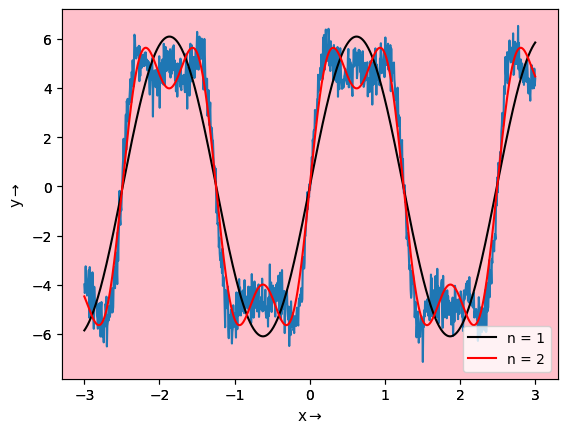

In [ ]:
from scipy.optimize import curve_fit
# Non-linear sinusoidal function
# Plot for no, of terms = 1, 2
plt.plot(x,y)
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x, y)

def sqWave_1(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L))
    
(L1, A1), _ = curve_fit(sqWave_1, x, y)
yest = sqWave_1(x, L1, A1)
plt.plot(x, yest, label = 'n = 1', c='k')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

def sqWave_2(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L) + (1/3) * np.sin(3*np.pi*t/L))
    
(L2, A2), _ = curve_fit(sqWave_2, x, y)
yest = sqWave_2(x, L2, A2)
plt.plot(x, yest, label = 'n = 2', c='r')
plt.legend(loc='lower right')
plt.show()
# Plot Graph


Clearly, 2 terms fits better than only 1 term. </br>
Plotting for 3 and 4 terms:

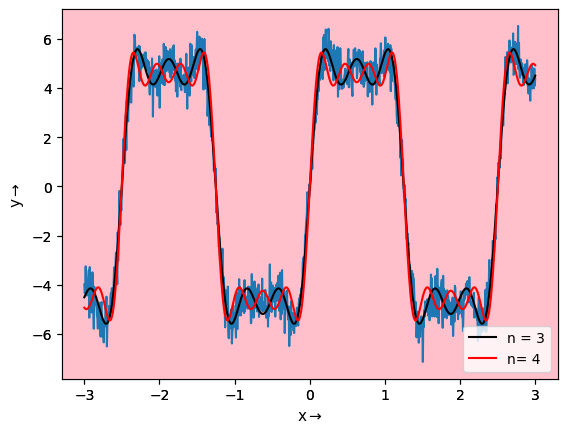

In [ ]:
# Non-linear sinusoidal function
# Plot for no. of terms = 3, 4
plt.plot(x,y)
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x, y)

def sqWave_3(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L) + (1/3) * np.sin(3*np.pi*t/L) + (1/5) * np.sin(5*np.pi*t/L))

(L3, A3), _ = curve_fit(sqWave_3, x, y)
yest = sqWave_3(x, L3, A3)
plt.plot(x, yest, label = 'n = 3', c = 'k')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

def sqWave_4(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L) + (1/3) * np.sin(3*np.pi*t/L) + (1/5) * np.sin(5*np.pi*t/L) + (1/7) * np.sin(7*np.pi*t/L))
    
(L4, A4), _ = curve_fit(sqWave_4, x, y)
yest = sqWave_4(x, L4, A4)
plt.plot(x, yest, label = 'n= 4', c='r')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

plt.legend(loc='lower right')
plt.show()

From the plot, it is clear that n = 3 fits the curve best.

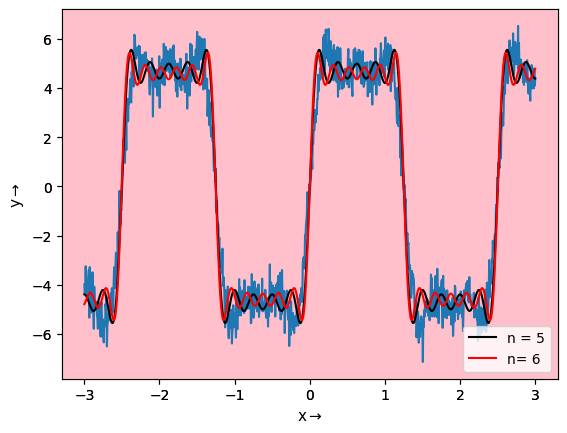

In [ ]:
# Non-linear sinusoidal function
# Plot for no. of terms = 3, 4
plt.plot(x,y)
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x, y)

def sqWave_5(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L) + (1/3) * np.sin(3*np.pi*t/L) + (1/5) * np.sin(5*np.pi*t/L) + (1/7) * np.sin(7*np.pi*t/L) + (1/9) * np.sin(9*np.pi*t/L))

(L5, A5), _ = curve_fit(sqWave_3, x, y)
yest = sqWave_5(x, L5, A5)
plt.plot(x, yest, label = 'n = 5', c=  'k')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)

def sqWave_6(t, L, A):
    return A * (4/np.pi) * ((1/1) * np.sin(1*np.pi*t/L) + (1/3) * np.sin(3*np.pi*t/L) + (1/5) * np.sin(5*np.pi*t/L) + (1/7) * np.sin(7*np.pi*t/L) + (1/9) * np.sin(9*np.pi*t/L) + (1/11) * np.sin(11*np.pi*t/L))
    
(L6, A6), _ = curve_fit(sqWave_4, x, y)
yest = sqWave_6(x, L6, A6)
plt.plot(x, yest, label = 'n= 6', c='r')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)
plt.legend(loc='lower right')
plt.show()

From the plots above, for n > 3, curve doesn't fit well and accuracy decreases with n. </br>

Hence, estimated equation is $y = A*\frac{4}{\pi} \sum_{n = 1}^3 \frac{1}{2n-1} \sin{\left( \frac{ (2n - 1) \pi x}{L} \right)}$

In [ ]:
print("The estimated parameters: ")
print(f"A = {A3}, L = {L3}")

The estimated parameters: 
A = 4.695620880372667, L = 1.2506520750065921


$$y = A * \frac 4 {\pi} \left (\sin \left (\frac{\pi x}{L} \right) + \frac 13 \sin \left (\frac{3 \pi x}{L} \right) + \frac 15 \sin \left (\frac{5 \pi x}{L} \right) \right)$$

Fundamental frequency $f$ = $\pi$/L, where L is given above. <br>

Plotting error bars:

Text(0, 0.5, 'y$\\rightarrow$')

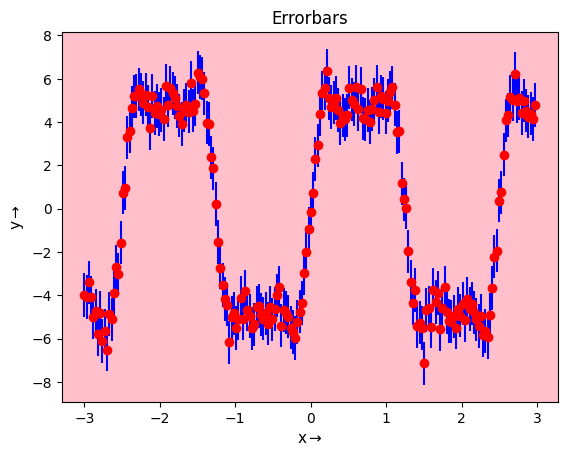

In [ ]:
# Plotting errorbars
sd = np.std((yest-y))
ax=plt.axes()
ax.set_facecolor('pink') # Standard deviation of error
plt.title("Errorbars")
plt.errorbar(x[::5], y[::5], yerr=sd, fmt='ro', ecolor= 'b')
plt.xlabel(r'x$\rightarrow$',fontsize=11)
plt.ylabel(r'y$\rightarrow$',fontsize=11)


# Dataset 3

Text(0.5, 0, 'Frequency(e15)$\\rightarrow$')

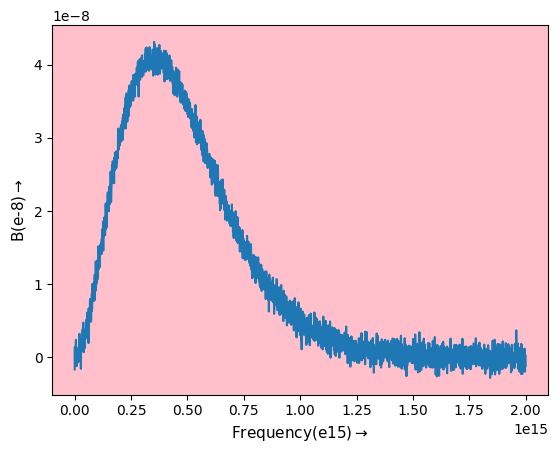

In [ ]:
x3, y3 = loadtxt('dataset3.txt', unpack = True)
# Plotting the dataset
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x3, y3)
plt.ylabel(r'B(e-8)$\rightarrow$',fontsize=11)
plt.xlabel(r'Frequency(e15)$\rightarrow$',fontsize=11)

Planck's radiation is given by:   
$$B_\nu(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_BT}}-1}$$

$B_\nu$: Spectral radiance </br>
$h$: Planck's constant </br>
$c$: speed of light</br>
$\nu$: frequency </br>
$k_B$: Boltzamann's constant </br>
$T$: Temperature

From the plot, it is evident that we must use a non-linear fit.

In `curve_fit` we set parameter *p0* as [6e-34, 300]. </br>
*p0* is the initial guess of the paramater. </br>

If None, then the initial values will all be set to 1. If p0 here is not specified, it will lead to an overflow error in the exponenent because $k_B$ (Boltzmann Constant) is of the order e-23.

In [ ]:
# Planck's law
c = 3.0e+08   # Speed of light (m/sec)
k = 1.380649e-23   # Boltzmann's constant 

def Bf(f, h, T):    
    return 2*h*pow(f,3)/(pow(c, 2)*(exp((h/k)*(f/T))-1))

# Estimating h and T
(hest, Test), pcov = curve_fit(Bf, x3, y3, p0 = [6e-34, 300]) # p0 is initial guess for the parameters
# if p0 is default (None), it may lead to overflow in exponential term
print(f'The estimated value of h (Planck constant) is {hest}.\n')
print(f'The estimated value of T (temperature) is {Test}.\n')
yest = Bf(x3, hest, Test) #fitting a curve

The estimated value of h (Planck constant) is 6.643229761074512e-34.

The estimated value of T (temperature) is 6008.535769916139.



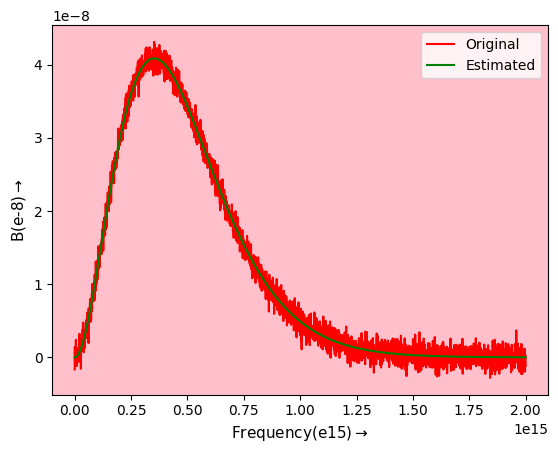

In [ ]:
# Plotting estimated verseus actual values for each input
ax=plt.axes()
ax.set_facecolor('pink')
plt.plot(x3, y3, label='Original', c = 'r')
plt.plot(x3, yest, label='Estimated', c= 'g')
plt.ylabel(r'B(e-8)$\rightarrow$',fontsize=11)
plt.xlabel(r'Frequency(e15)$\rightarrow$',fontsize=11)
plt.legend()

The function returns estimated values: <br>

$h = 6.643229756042452e-34$ Js <br> $T = 6008.535766503453$ K <br> 

The result has very high accuracy, as seen in the plot.

Plotting error bars:

Text(0.5, 0, 'Frequency(e15)$\\rightarrow$')

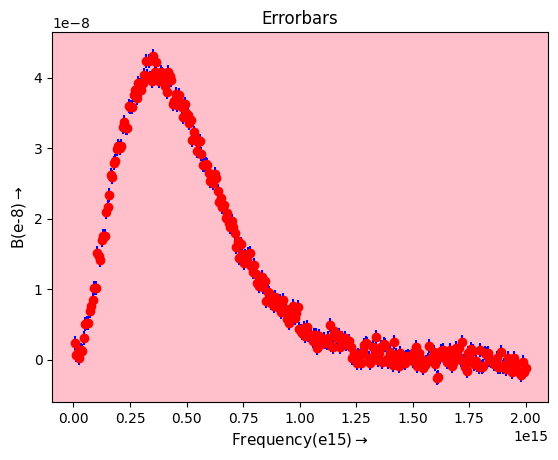

In [ ]:
# Plotting errorbars
sd = np.std((yest-y3))
ax=plt.axes()
ax.set_facecolor('pink')
plt.title("Errorbars")
plt.errorbar(x3[::10], y3[::10], yerr=sd, fmt= 'ro',ecolor= 'b')
plt.ylabel(r'B(e-8)$\rightarrow$',fontsize=11)
plt.xlabel(r'Frequency(e15)$\rightarrow$',fontsize=11)

# Dataset 4:

The dataset suggests that random variable $y$ is examined by a series of trials ($x$).

Each trial, has several instances leading to differnet outcomes.  

Plotting the dataset (in a scatter format):

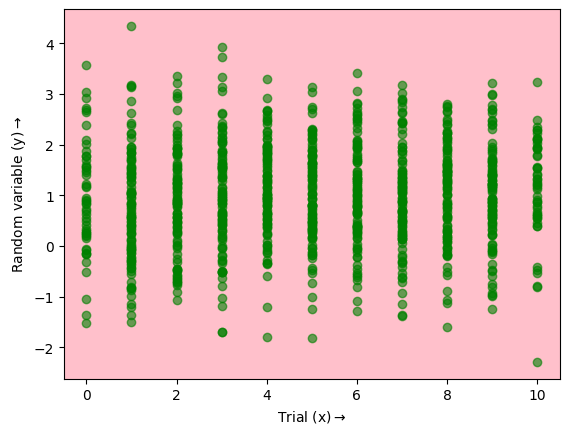

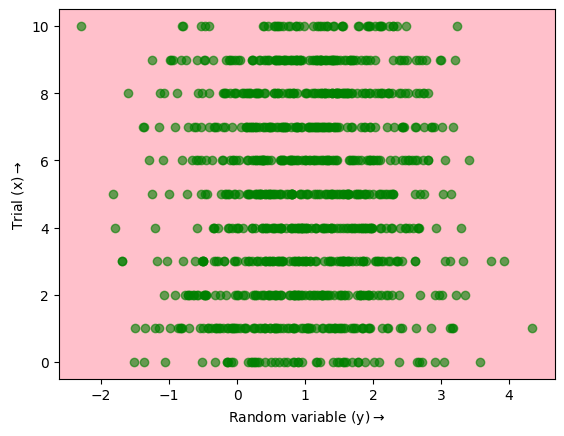

In [ ]:
x4, y4 = loadtxt('dataset4.txt', unpack = True)
ax=plt.axes()
ax.set_facecolor('pink')
plt.scatter(x4, y4, alpha=.6, c ='g')
plt.xlabel(r'Trial (x)$\rightarrow$')
plt.ylabel(r'Random variable (y)$\rightarrow$')
plt.show()
ax=plt.axes()
ax.set_facecolor('pink')
plt.scatter(y4, x4, alpha=.6, c ='g')
plt.ylabel(r'Trial (x)$\rightarrow$')
plt.xlabel(r'Random variable (y)$\rightarrow$')
plt.show()

The scatter plot suggest that for each trial ($x$), the output is more dense towards a central mean. As deviation of a certain outcome from the central mean increases, the likelihood of that outcome also decreases. This is evident from the less dense scatter plots towards the extremes.

One way to infer this plot is that, at every integer x = $n_0$, there is a gaussian distribution $y(n_0)$ <br>
Any natural data/experiment has a greater tendency to have the shape of a bell curve (The Gaussian curve)

Each trial ($x$) returns gaussian data for random variable $y$</br>
Let's learn more about the data

Going through the data, we observe that the trials are sorted. </br>
Size of sample for each trial ($x$):

In [ ]:
for i in range(11):
    print(f"Trial - {i}, Sample Size: {np.count_nonzero(x4 == i)}")

Trial - 0, Sample Size: 50
Trial - 1, Sample Size: 100
Trial - 2, Sample Size: 100
Trial - 3, Sample Size: 100
Trial - 4, Sample Size: 100
Trial - 5, Sample Size: 100
Trial - 6, Sample Size: 100
Trial - 7, Sample Size: 100
Trial - 8, Sample Size: 100
Trial - 9, Sample Size: 100
Trial - 10, Sample Size: 50


We have 50 samples each for $n_0$ = 0 and 10 and 100 samples each for $n_0$ = 1, 2, 3,..., 9

To support this argument, let us plot histograms for each trial:

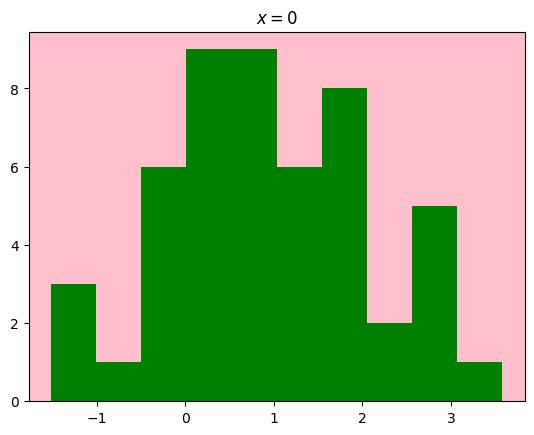

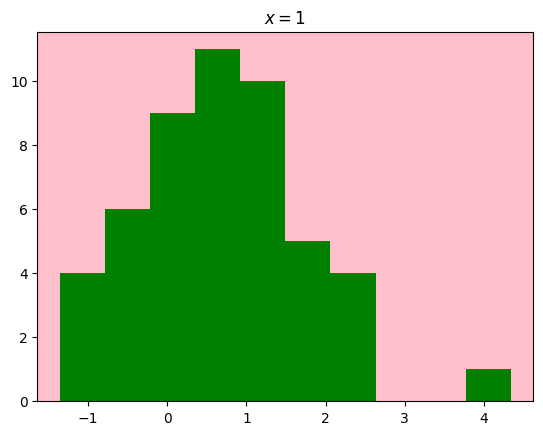

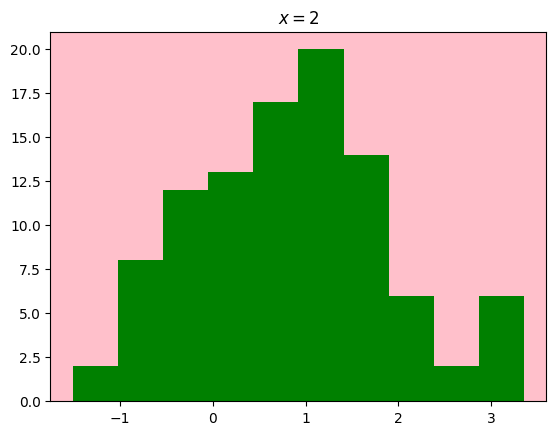

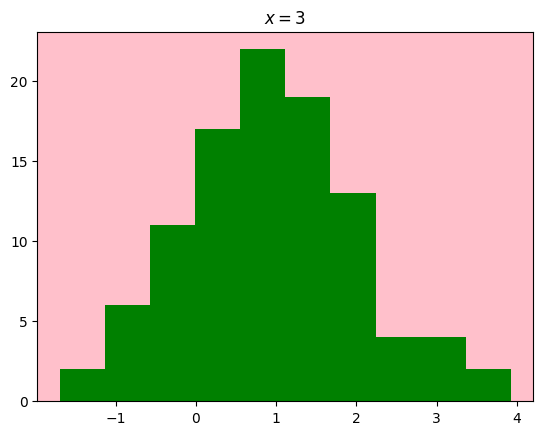

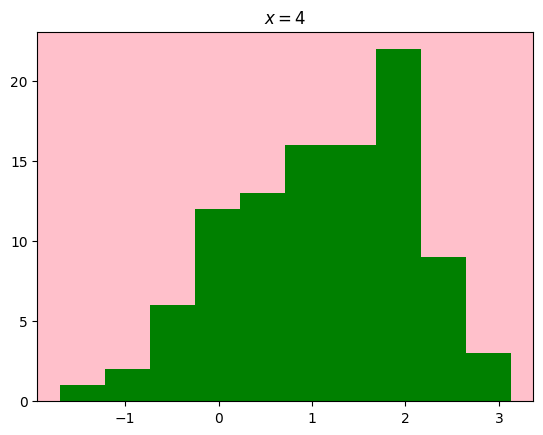

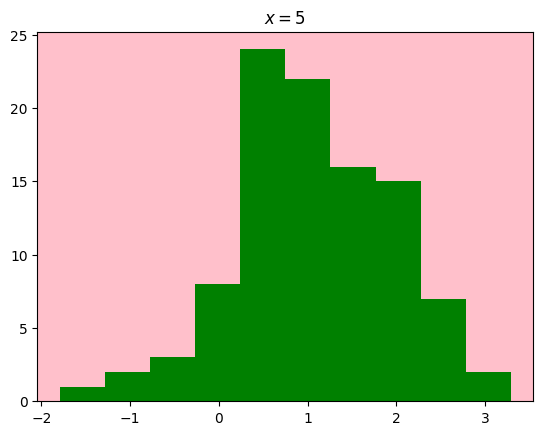

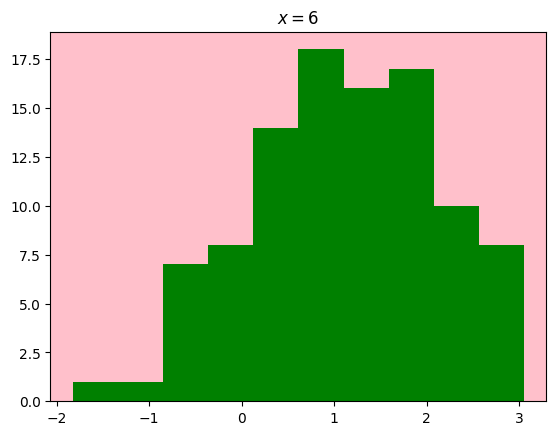

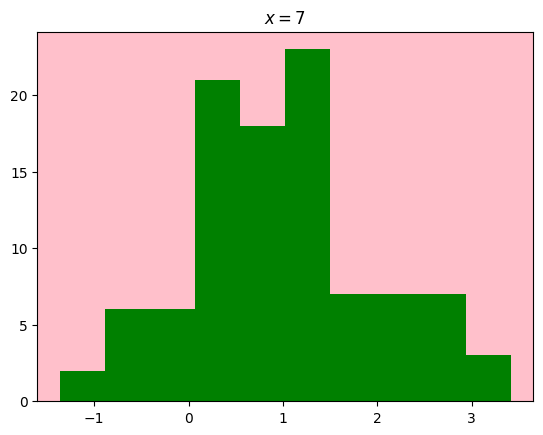

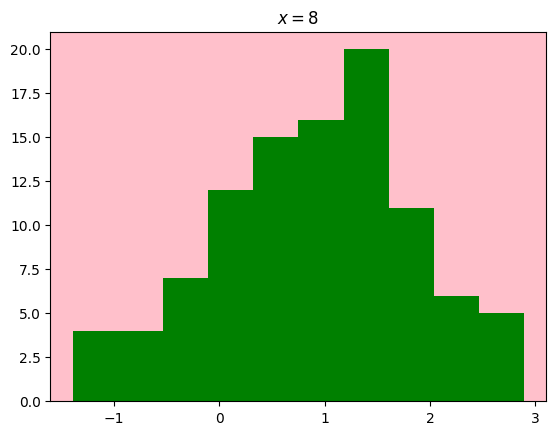

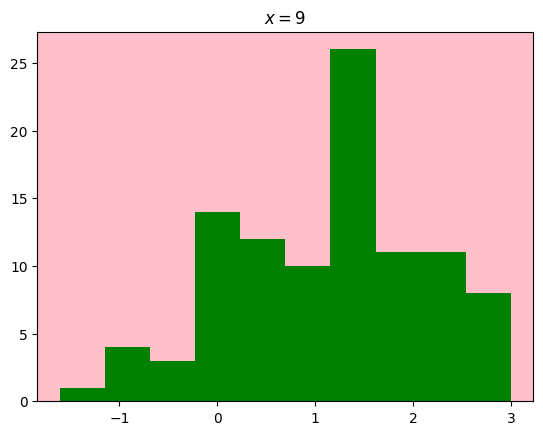

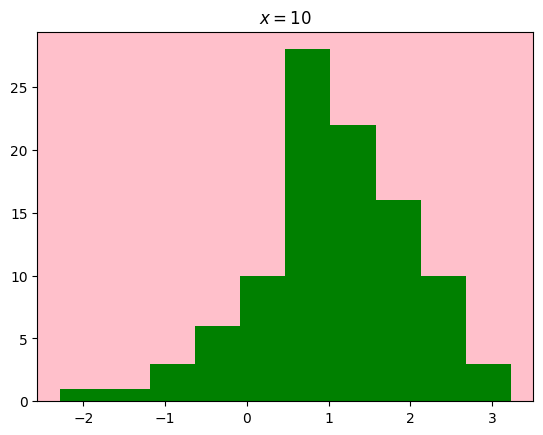

In [ ]:
# splits holds the indices for each trial in the datset
splits = []
for i in range(11):
    splits.append(np.count_nonzero(x4 == i))
splits = np.insert(splits, 0, 0., axis=0)
splits = np.append(splits, -1)

# Plotting histograms for each trial
sum_i = splits[0]
sum_f = splits[1]
count = 0
while(splits[count+1] != -1):
    ax=plt.axes()
    ax.set_facecolor('pink')
    plt.hist(y4[sum_i:sum_f], color= 'g')
    plt.title('$x= $' + str(count))
    plt.show()
    sum_i = sum_f
    sum_f += splits[count+1]
    count += 1

The histograms resembles a bell curve with the expected value of random variable $y$ being the peak of the bell curve. </br>

The histograms suggest that random variable ($y$) has a gaussian distribution.


We use norm package from scipy library to find the cdf of a standard normal distribution. </br>
`norm.cdf()` returns the cdf of a real value in the standard normal distributution.

Probabilty Density function of a gaussian distribution:\
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$\
$\mu =$ Mean\
$\sigma =$ Standard Deviation\
CDF at a point x is $ \int_{-\infty}^{x} f(t) dt $

In [ ]:
from scipy.stats import norm

# Defining a cdf for a general gaussian distribution by applying affine transformation with mean and standard deviation
def gauss_cdf(x, stddev, mean, amplitude):
    return amplitude * norm.cdf((x - mean)/stddev)

The following function fits a gaussian curve to our dataset using `curve_fit()` and plots it comparing the original dataset . </br>
We sort our data before plotting to resemble a cdf function.

In [ ]:
# Function to fit a gaussian and plotting
def plot_compare(out, heading):
    out = sort(out)
    actual = np.arange(0, 1, 1/len(out)) # Initialising np array with appropriate step size

    # Using curve_fit to fit a curve
    (stddev, mean, amplitude), pcov = curve_fit(gauss_cdf, out, actual)
    ax=plt.axes()
    ax.set_facecolor('pink')
    plt.title(heading)
    plt.plot(out, actual, label = 'Original', c = 'k')
    plt.plot(out,  gauss_cdf(out, stddev, mean, amplitude), label = 'Estimated', c = 'green')
    plt.legend()
    plt.show()

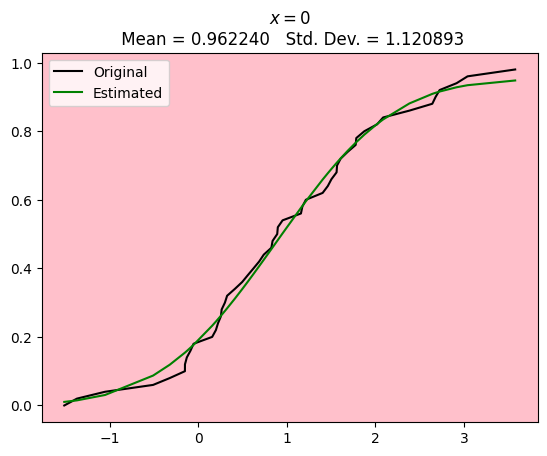

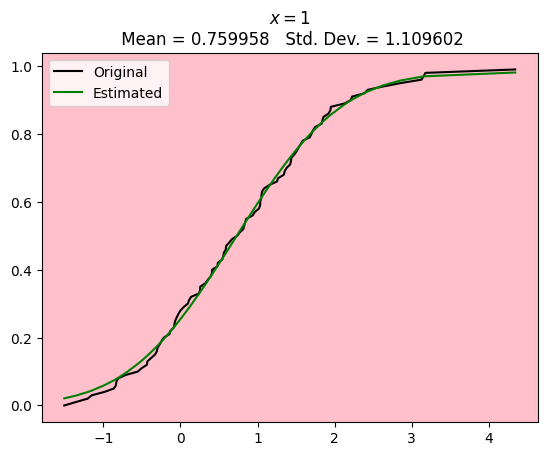

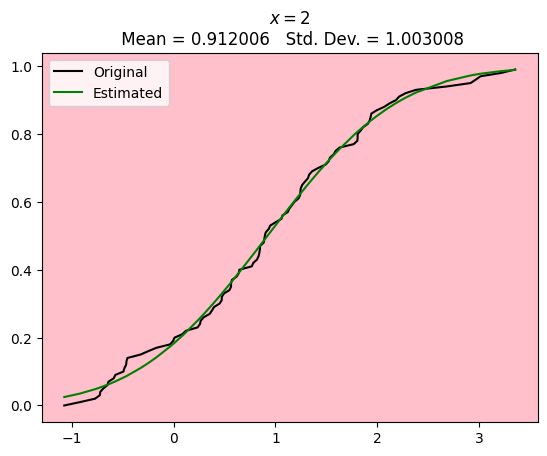

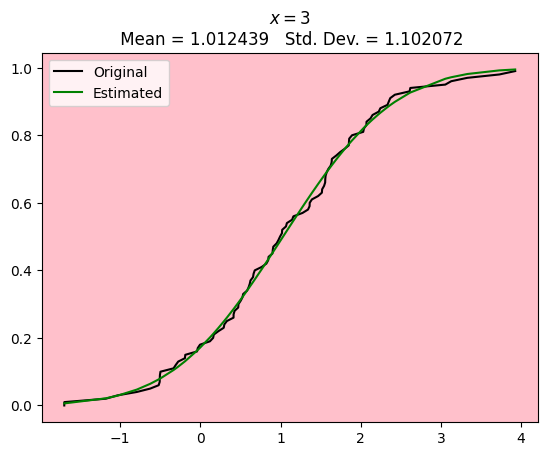

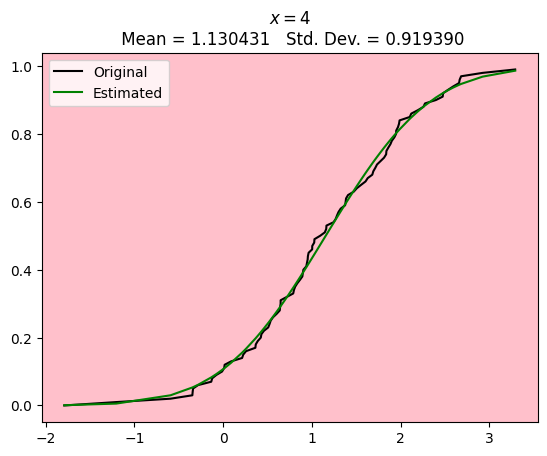

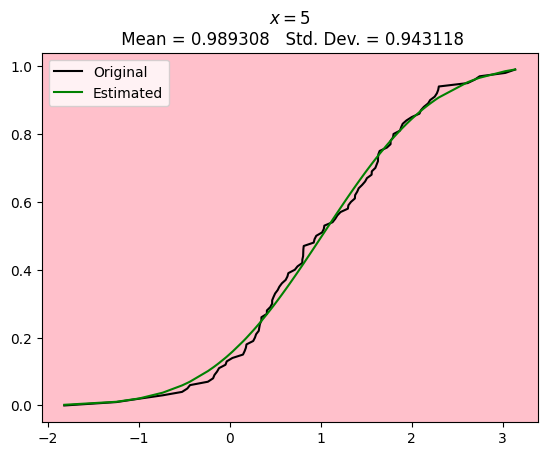

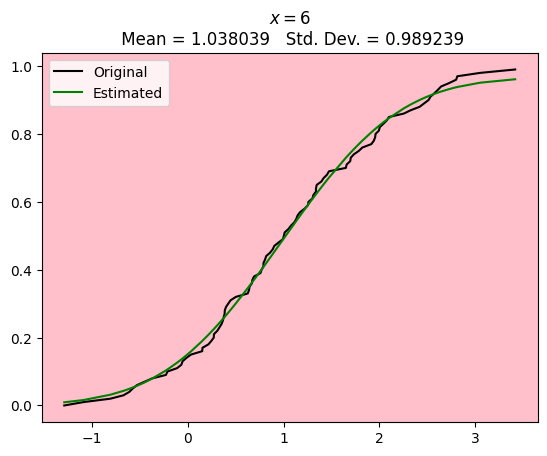

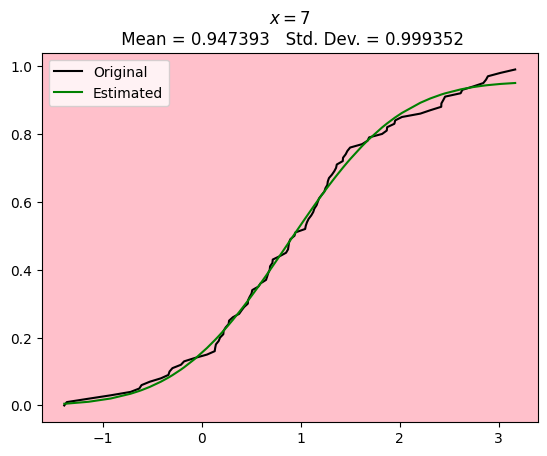

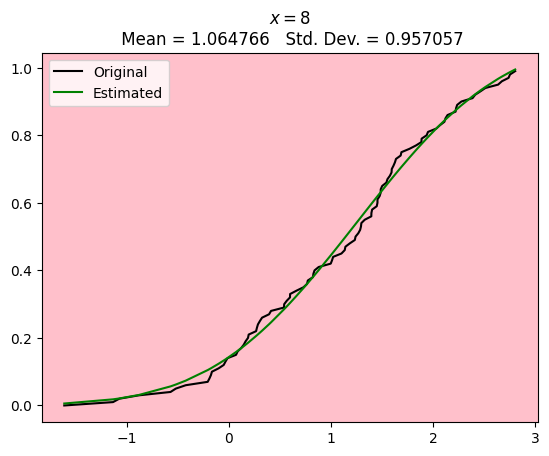

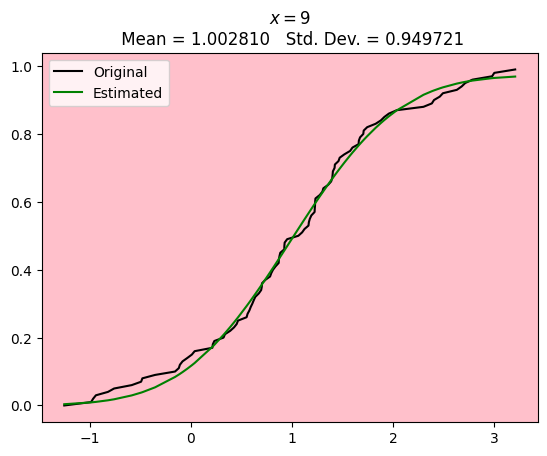

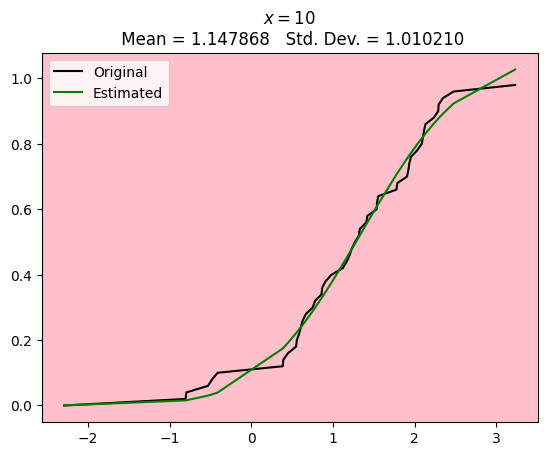

In [ ]:
sum_i = splits[0]
sum_f = splits[1]

# Initialising a list to store expected value of each trial
expected_value = []
count = 0
while(splits[count+1] != -1):
    # Plotting fitted curve with actual dataset
    # Calling plot_compare for each trial
    expected_value.append(np.mean(y4[sum_i:sum_f]))
    plot_compare(y4[sum_i: sum_f], f'$x = ${count}\n Mean = {np.mean(y4[sum_i:sum_f]):.6f}   Std. Dev. = {np.std(y4[sum_i:sum_f]):.6f}')
    count+=1
    sum_i = sum_f
    sum_f += splits[count+1]

The above plots support our assumption that random variable $y$ has a gaussian distribution as the sorted data fits well with the CDF of a gaussian.

For any experiment with natural data, we run multiple instances for each trial. </br>
To minimize the error we take the weighted mean of all instances for a specific trial.

For a gaussian distribution with density function:
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$

$$E(x) = \mu$$

Hence, we can return the mean of the gaussian (peak of the bell curve) for each trial.

Now, we shall fit a curve across trials:

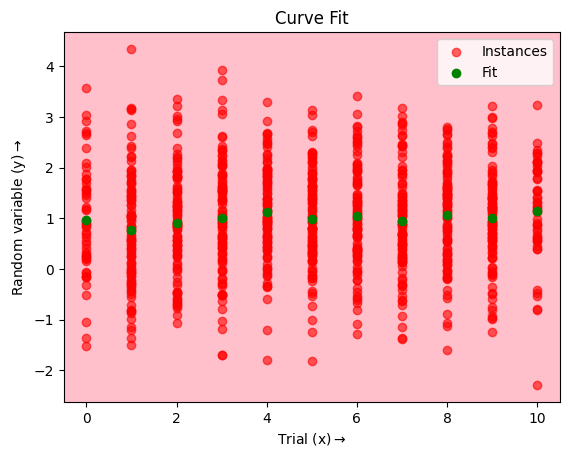

In [ ]:
# Fitting a curve across trials
trials = np.unique(x4)
ax=plt.axes()
ax.set_facecolor('pink')

plt.scatter(x4, y4, alpha=.6, c ='r', label='Instances')
plt.scatter(trials, expected_value, c = 'g', label = 'Fit')
plt.xlabel(r'Trial (x)$\rightarrow$')
plt.ylabel(r'Random variable (y)$\rightarrow$')
plt.title("Curve Fit")
plt.legend()

From the plot, the scatter points seem to fit on a line.

We regress linearly across the means to find the estimated fit (Using linear fit)

In [ ]:
def line(x, m, c):
    return m * x + c

# Fitting a curve across trials
trials = np.unique(x4)
(m, c), cov = curve_fit(line, trials, expected_value)
print(f"The estimated fit is {m} x + {c}")
ax=plt.axes()
ax.set_facecolor('pink')
plt.xlabel(r'Trial (x)$\rightarrow$')
plt.ylabel(r'Random variable (y)$\rightarrow$')
plt.scatter(x4, y4, alpha=.6, c ='g')
plt.scatter(trials, expected_value, c = 'b')
plt.plot(trials, line(trials, m, c), c = 'k')
plt.ylim([-2, 4])
plt.legend(["Given data", "Mean value", "Fit"])

NameError: name 'np' is not defined

The above fit across means of trials is the estimated curve. 

$$y = 0.01941221713633212 x + 0.8999624797725327$$